In [52]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
from run_sim import *

# analyze curves

In [53]:
out_dir = '/accounts/projects/vision/chandan/rf_interactions/sim_comparisons/sim_results'
curves_list = [pkl.load(open(oj(out_dir, f'curves_1d_{i}.pkl'), 'rb')) for i in range(1, 11)]

In [54]:
mse_dac, mse_pdp = [], []
corr_dac, corr_pdp = [], []
for func_num in range(10):
    curves = curves_list[func_num]
    for i in range(len(curves)):
        curves_i = curves[i]
        exp = curves_i['exp']
        dac = curves_i['dac']
        pdp_xi = curves_i['pdp']
        mse_dac.append(np.mean((exp - dac) ** 2))
        mse_pdp.append(np.mean((exp - pdp_xi) ** 2))
        corr_dac.append(np.corrcoef(dac, exp)[0, 1])
        corr_pdp.append(np.corrcoef(pdp_xi, exp)[0, 1])

**plot results**

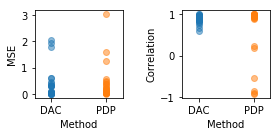

In [55]:
num_pts = len(mse_dac)

plt.figure(figsize=(4, 2))
R, C = 1, 2
plt.subplot(R, C, 1)
plt.plot([0] * num_pts, mse_dac, 'o', alpha=0.5)
plt.plot([1] * num_pts, mse_pdp, 'o', alpha=0.5)
plt.ylabel('MSE')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')


plt.subplot(R, C, 2)
plt.plot([0] * num_pts, corr_dac, 'o', alpha=0.5)
plt.plot([1] * num_pts, corr_pdp, 'o', alpha=0.5)
plt.ylabel('Correlation')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')

plt.tight_layout()
plt.savefig('sim_figs/mse.pdf')
plt.show()

In [56]:
print('\t  dac,   pdp')
print(f'mse means {np.mean(mse_dac):0.3f}, {np.mean(mse_pdp):0.3f}')
print(f'corr means {np.mean(corr_dac):0.3f}, {np.mean(corr_pdp):0.3f}')


print(f'mse medians {np.median(mse_dac):0.3f}, {np.median(mse_pdp):0.3f}')
print(f'corr medians {np.median(corr_dac):0.3f}, {np.median(corr_pdp):0.3f}')

	  dac,   pdp
mse means 0.413, 0.406
corr means 0.869, 0.602
mse medians 0.200, 0.167
corr medians 0.869, 0.956


**look at curves**

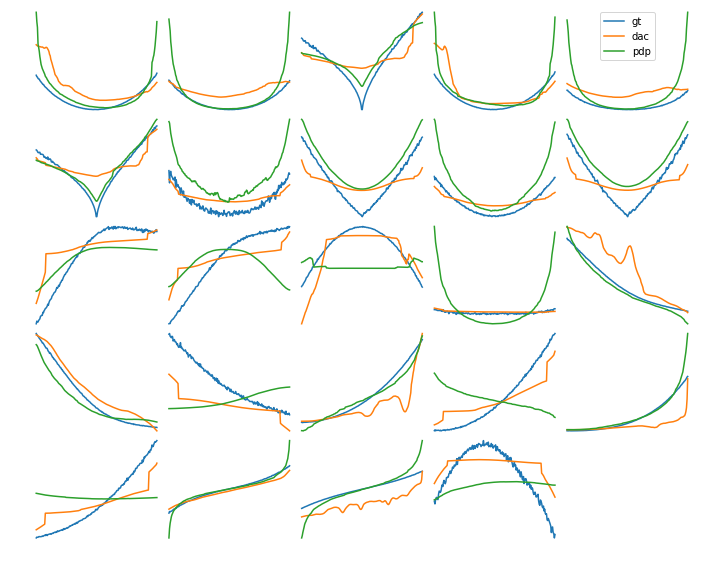

In [58]:
num_vars = 10
R, C = 5, 5
count = 1
plt.figure(figsize=(10, 8))
for func_num in range(10):
    curves = curves_list[func_num]
    
    for i in range(len(curves)):
        plt.subplot(R, C, count)
        curves_i = curves[i]
        plt.plot(curves_i['exp'], label='gt')
        plt.plot(curves_i['dac'], label='dac')
        plt.plot(curves_i['pdp'], label='pdp')
        plt.axis('off')
        if count == C:
            plt.legend()
            
        count += 1
        
        if count > R * C:
            break
            
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('sim_figs/curves.pdf')
plt.show()